In [3]:
pip install selfies rdkit numpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/22.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.4 MB 217.9 kB/s eta 0:01:43
   ---------------------------------------- 0.0/22.4 MB 217.9 kB/s eta 0:01:43
   ---------------------------------------- 0.0/22.4 MB 217.9 kB/s eta 0:01:43
   ---------------------------------------- 0.0/22.4 MB 217.9 kB/s eta 0:01:43
   ---------------------------------------- 0.1/22.4 MB 252.2 kB/s eta 0:01:29
   ---------------------------------------- 0.1/22.4 MB 231.0 kB/s eta 0:01:37
   ---------------------------------------- 0.1/22.4 MB 344.8 kB/s eta 0:01:05
   ---------------------------------------- 0.1/22.4 MB 344.8 kB/s eta 0:01:05
   ---------------------------------------- 0.1/22.4 MB 300.4 kB/s eta 0:01:15
   ---------------------------------------- 0.1/22.4 MB 300.4 kB/s eta 

In [2]:
import selfies as sf
from rdkit import Chem
import numpy as np
from IPython.display import Image
from IPython.display import display
from rdkit.Chem import AllChem

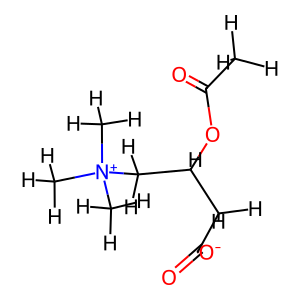

In [3]:
def visualize_molecule(string_input, is_selfies=False, size=(300, 300)):
    # Convert SELFIES to SMILES if needed
    if is_selfies:
        smiles = sf.decoder(string_input)
    else:
        smiles = string_input
    
    # Create RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid molecule string")
    
    # Generate 2D coordinates for the molecule
    mol = Chem.AddHs(mol)  # Add hydrogens
    AllChem.EmbedMolecule(mol, randomSeed=42)  # Generate 3D coords
    AllChem.MMFFOptimizeMolecule(mol)  # Optimize geometry
    #mol = Chem.RemoveHs(mol)  # Remove hydrogens for cleaner visualization
    
    # Create the drawing
    img = Chem.Draw.MolToImage(mol, size=size)
    
    return img

selfies_str = "[O-1][C][=Branch1][C][=O][C][C][Branch1][#Branch2][C][N+1][Branch1][C][C][Branch1][C][C][C][O][C][=Branch1][C][=O][C]"
img_selfies = visualize_molecule(selfies_str, is_selfies=True)

display(img_selfies)

In [31]:
def get_adjacency_matrix(selfies_string):
    # Convert SELFIES to SMILES
    smiles = sf.decoder(selfies_string)
    
    # Convert SMILES to RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SELFIES string or conversion failed")
    
    # Get adjacency matrix using RDKit's built-in function
    adj_matrix = Chem.rdmolops.GetAdjacencyMatrix(Chem.AddHs(mol))
    
    return adj_matrix

# Example usage
selfies_string = "[C][O]"
adj_matrix = get_adjacency_matrix(selfies_string)
print(f"Adjacency matrix for {selfies_string}:")
print("  C O H H H H")
print(adj_matrix)

print(f"\nA²:")
print(adj_matrix @ adj_matrix)

print(f"\nA² - diagonalūs elementai:")
print(adj_matrix @ adj_matrix * (1 - np.eye(len(adj_matrix[0])).astype(int)))

print(f"\nA³:")
print(adj_matrix @ adj_matrix @ adj_matrix)

print(f"\nA³ - A elementai:")
print(adj_matrix @ adj_matrix @ adj_matrix * (1 - adj_matrix))

Adjacency matrix for [C][O]:
  C O H H H H
[[0 1 1 1 1 0]
 [1 0 0 0 0 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]]

A²:
[[4 0 0 0 0 1]
 [0 2 1 1 1 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [1 0 0 0 0 1]]

A² - diagonal elements:
[[0 0 0 0 0 1]
 [0 0 1 1 1 0]
 [0 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 0]
 [1 0 0 0 0 0]]

A³:
[[0 5 4 4 4 0]
 [5 0 0 0 0 2]
 [4 0 0 0 0 1]
 [4 0 0 0 0 1]
 [4 0 0 0 0 1]
 [0 2 1 1 1 0]]

A³ - A elements:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 1 1 1 0]]


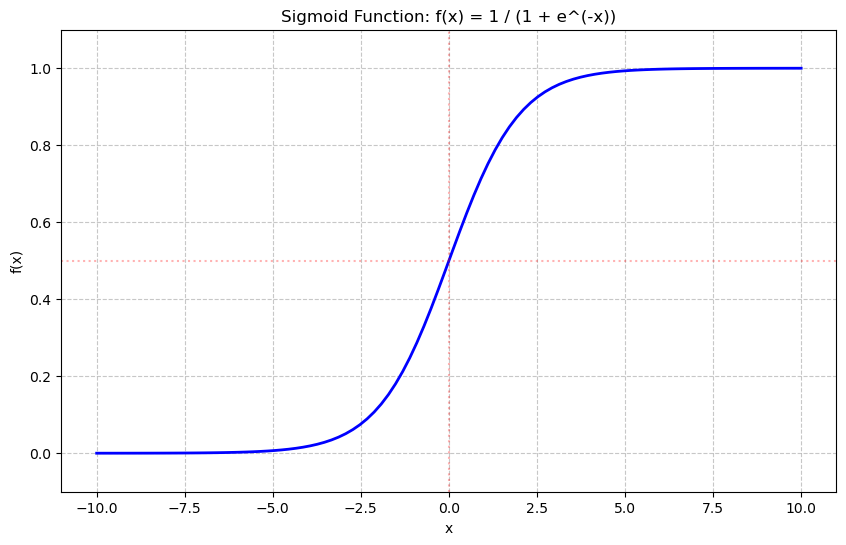

In [34]:
import matplotlib.pyplot as plt

def sigmoid(x):
    """Calculate sigmoid function: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

# Create data points
x = np.linspace(-10, 10, 100)  # Create 100 points from -10 to 10
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)

# Add labels and title
plt.title('Sigmoid Function: f(x) = 1 / (1 + e^(-x))', fontsize=12)
plt.xlabel('x', fontsize=10)
plt.ylabel('f(x)', fontsize=10)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add horizontal and vertical lines at 0.5 and 0
plt.axhline(y=0.5, color='r', linestyle=':', alpha=0.3)
plt.axvline(x=0, color='r', linestyle=':', alpha=0.3)

# Set y-axis limits
plt.ylim(-0.1, 1.1)

# Show plot
plt.show()

In [35]:
"""
ryšio ilgis 1-3 Å
ryšio kampai 0-2π
dvisieniai kampai 0-2π
"""

'\nryšio ilgis 1-3 Å\nryšio kampai 0-2π\ndvisieniai kampai 0-2π\n'

In [ ]:
L =